## 3. Distribuciones

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
dataset = pandas.read_csv('hfi_cc_2018.csv')

In [3]:
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [4]:
w_dataset = dataset[important_cols]
w_dataset.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


In [5]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [6]:
## Filtro Latam por region Latinoamerica y Caribe
latam = w_dataset[w_dataset['region'] == 'Latin America & the Caribbean']
## Filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned = latam['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned.describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

**- Histograma de Distribucion de la variable *pf_identity***

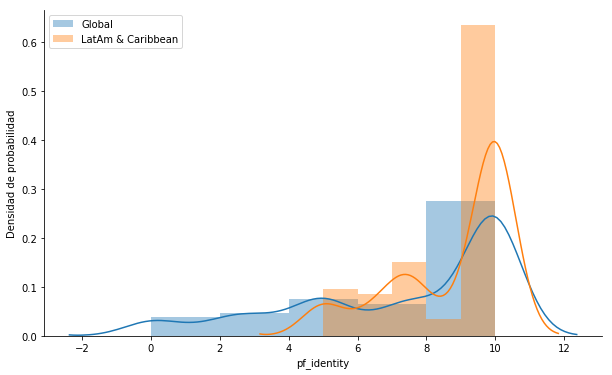

In [7]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global 
seaborn.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
seaborn.distplot(pf_identity_latam_cleaned, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

In [8]:
## Filtro por hf_score remuevo los valores NaN
hf_score_cleaned = w_dataset['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_cleaned.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [9]:
## Filtro Latam por hf_score y remuevo valores NaN
hf_score_latam_cleaned = latam['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_latam_cleaned.describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *hf_score***

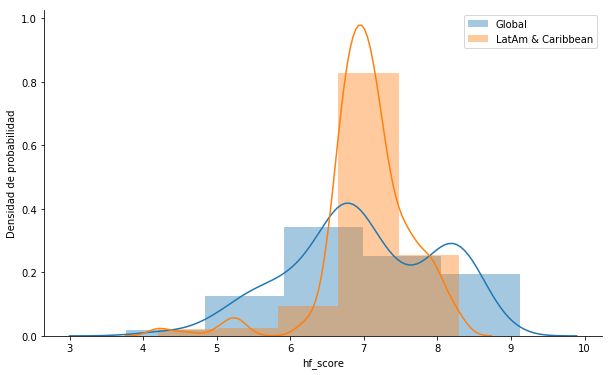

In [10]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**1. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

Parecería ser de distribucion Normal: mas sesgada en el caso de *pf_identity*. Mientras que en el caso de *hf_score*, la curva se asemeja más a una campana de Gauss "clásica".
Lo que salta a la vista tras ver las los graficos es como si existiera una superposicion de 2 o más gaussianas, lo que insentiva a indagar un poco mas profundo en los registros. Se propone, entonces, presentar un par de nuevos graficos con los puntajes de cada pais de Latinoamerica y El Caribe y analizar así cuales de ellos son los responsables de "deformar" la curva normal clasica.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

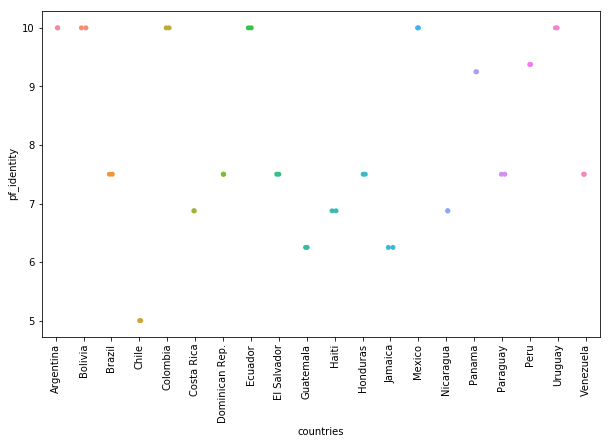

In [51]:
# Stripplot de la variable "pf_identity" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.stripplot(data=latam.dropna(), x="countries", y="pf_identity", jitter=True)
plt.xticks(rotation=90)
#plt.ylim([0,10])

Podemos observar como los paises se dividen en un grupo que poseen puntaje alto, otros puntaje medio, quedando Chile como outlier. Esto se corresponde con los 3 "picos" que vemos en el grafico de distribucion.

(0, 10)

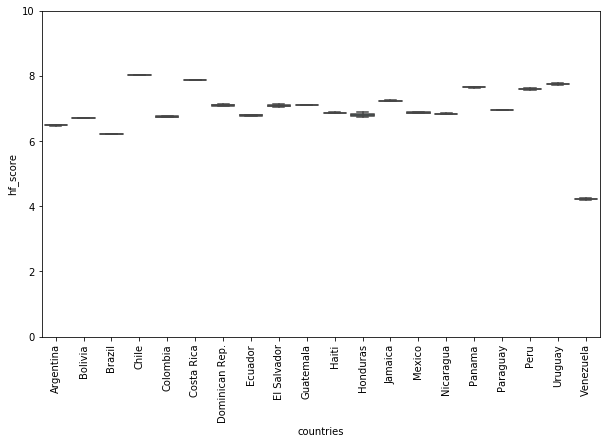

In [49]:
## Boxplot de la variable "hf_score" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.boxplot(data=latam.dropna(), x="countries", y="hf_score")
plt.xticks(rotation=90)
plt.ylim([0,10])

En este caso, vemos como Venezuela esta claramente lejos del resto de los paises, correspondiendose con el "pico" mas bajo que vemos en el grafico de distribucion. Luego la gran mayoria de los paises se focalizan en valores medios-altos (el "pico" central) y vemos otra vez a Chile, esta vez acompañado por Uruguay, como poseen valores ligeramente por encima de la media, haciendo referencia de esta forma al pequeño abultamiento que vemos en la cola del gráfico de distribucion.

In [70]:
from scipy import stats
from sklearn import preprocessing
## Prueba de Kolmogorov-Smirnof para *pf_identity* (latam)
pf_identity_latam_cleaned_norm = preprocessing.scale(pf_identity_latam_cleaned)
stats.kstest(pf_identity_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [60]:
## Prueba de Kolmogorov-Smirnof para *hf_score* (latam)
hf_score_latam_cleaned_norm = preprocessing.scale(hf_score_latam_cleaned)
stats.kstest(hf_score_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.15003247403280606, pvalue=5.043599840583937e-05)

**2. Prueba de Kolmogorov-Smirnof**

